1. Завантаження бібліотек та даних


In [76]:
library(ggplot2)
library(dplyr)

# Завантаження CSV-файлу
df <- read.csv("data1.csv", sep=";", stringsAsFactors=FALSE)

# Перетворення числових значень для всіх колонок, крім 'Country.name'
df <- df %>%
  mutate(across(.cols = -Country.name,  # Виключаємо 'Country.name'
                .fns = ~ as.numeric(gsub(",", ".", .)), 
                .names = "{.col}"))

# Перевірка структури даних
str(df)
summary(df)


'data.frame':	143 obs. of  11 variables:
 $ Country.name                              : chr  "Finland" "Denmark" "Iceland" "Sweden" ...
 $ Ladder_score                              : num  7.74 7.58 7.53 7.34 7.34 ...
 $ upperwhisker                              : num  7.82 7.66 7.62 7.42 7.41 ...
 $ lowerwhisker                              : num  7.67 7.5 7.43 7.27 7.28 ...
 $ Log_GDP_per_capita                        : num  1.84 1.91 1.88 1.88 1.8 ...
 $ Explained.by..Social.support              : num  1.57 1.52 1.62 1.5 1.51 ...
 $ Explained.by..Healthy.life.expectancy     : num  0.695 0.699 0.718 0.724 0.74 0.706 0.704 0.708 0.747 0.692 ...
 $ Explained.by..Freedom.to.make.life.choices: num  0.859 0.823 0.819 0.838 0.641 0.725 0.835 0.801 0.759 0.756 ...
 $ Explained.by..Generosity                  : num  0.142 0.204 0.258 0.221 0.153 0.247 0.224 0.146 0.173 0.225 ...
 $ Explained.by..Perceptions.of.corruption   : num  0.546 0.548 0.182 0.524 0.193 0.372 0.484 0.432 0.498 0.323 ...

 Country.name        Ladder_score    upperwhisker    lowerwhisker  
 Length:143         Min.   :1.721   Min.   :1.775   Min.   :1.667  
 Class :character   1st Qu.:4.726   1st Qu.:4.846   1st Qu.:4.606  
 Mode  :character   Median :5.785   Median :5.895   Median :5.674  
                    Mean   :5.528   Mean   :5.641   Mean   :5.414  
                    3rd Qu.:6.416   3rd Qu.:6.508   3rd Qu.:6.319  
                    Max.   :7.741   Max.   :7.815   Max.   :7.667  
                                                                   
 Log_GDP_per_capita Explained.by..Social.support
 Min.   :0.000      Min.   :0.0000              
 1st Qu.:1.078      1st Qu.:0.9217              
 Median :1.431      Median :1.2375              
 Mean   :1.379      Mean   :1.1343              
 3rd Qu.:1.742      3rd Qu.:1.3833              
 Max.   :2.141      Max.   :1.6170              
 NA's   :3          NA's   :3                   
 Explained.by..Healthy.life.expectancy
 Min.   :0.0000          

2. Візуалізація зв'язку між змінними


`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 3 rows containing non-finite outside the scale range (`stat_smooth()`)."
Warning message:
"Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`)."


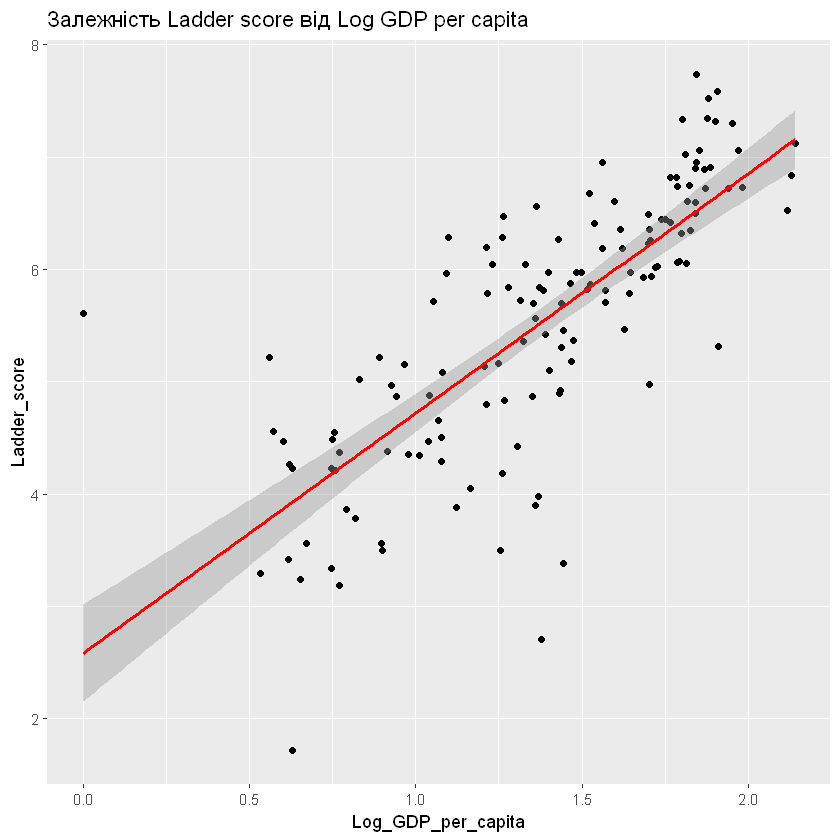

In [77]:
ggplot(df, aes(x = Log_GDP_per_capita, y = Ladder_score)) +
  geom_point() +
  geom_smooth(method = "lm", col = "red") +
  labs(title = "Залежність Ladder score від Log GDP per capita")


3. Побудова простої лінійної регресії


In [78]:
# If needed, after renaming
model <- lm(Ladder_score ~ Log_GDP_per_capita, data = df)
summary(model)



Call:
lm(formula = Ladder_score ~ Log_GDP_per_capita, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.82003 -0.37094  0.05679  0.40998  3.02053 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          2.5865     0.2183   11.85   <2e-16 ***
Log_GDP_per_capita   2.1355     0.1514   14.11   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7585 on 138 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.5906,	Adjusted R-squared:  0.5876 
F-statistic: 199.1 on 1 and 138 DF,  p-value: < 2.2e-16


4. Перевірка діагностичних графіків


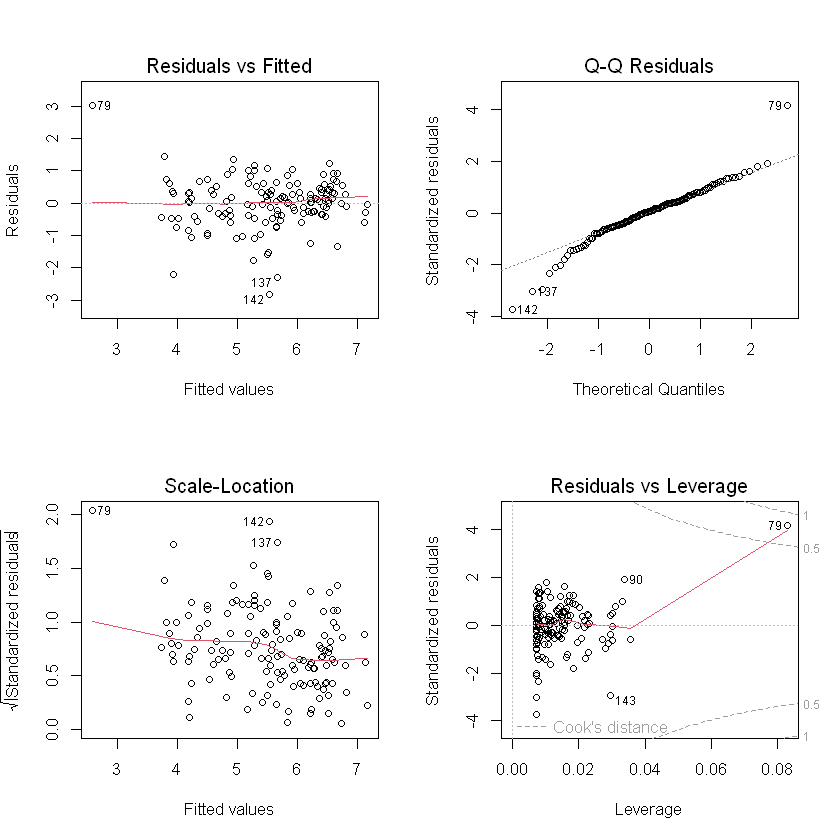

In [79]:
par(mfrow=c(2,2))
plot(model)

5. Прогнозування


In [85]:
new_data <- data.frame(`Log_GDP_per_capita` = c(2.5, 0.1, 3))
predictions <- predict(model, new_data)
print(predictions)

       1        2        3 
7.925187 2.800015 8.992931 


6. Обчислення відстані Кука


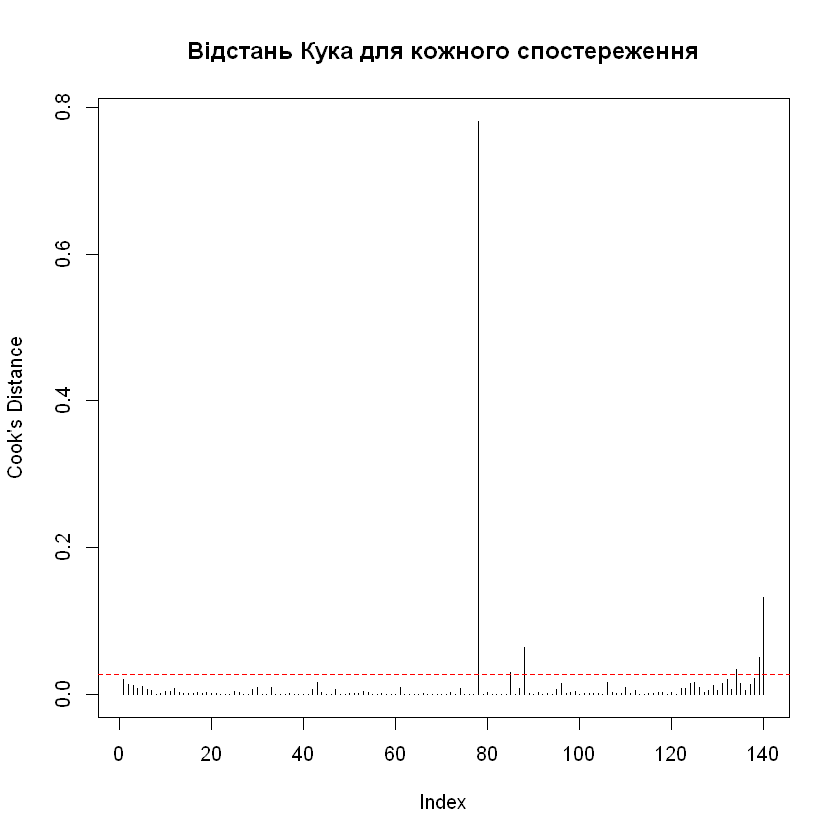

In [82]:
# Обчислення відстані Кука
cooks_dist <- cooks.distance(model)

# Візуалізація відстаней Кука
plot(cooks_dist, type="h", main="Відстань Кука для кожного спостереження", ylab="Cook's Distance")
abline(h = 4/(nrow(df)), col="red", lty=2)  # Граничне значення


7. Ідентифікація впливних точок


In [84]:
# Порогове значення
threshold <- 4 / nrow(df)

# Обчислення Cook's distance для первинної моделі
# (припускаємо, що модель була навчена за цими змінними)
model <- lm(Ladder_score ~ Log_GDP_per_capita, data = df)
cooks_dist <- cooks.distance(model)

# Визначення впливних точок
influential_points <- which(cooks_dist > threshold)

# Видалення впливних точок
df_cleaned <- df[-influential_points, ]

# Повторне навчання моделі на очищених даних
model_cleaned <- lm(Ladder_score ~ Log_GDP_per_capita, data = df_cleaned)
summary(model_cleaned)



Call:
lm(formula = Ladder_score ~ Log_GDP_per_capita, data = df_cleaned)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.83723 -0.36772  0.06945  0.43534  2.92054 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          2.6865     0.2287   11.75   <2e-16 ***
Log_GDP_per_capita   2.0754     0.1571   13.21   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7635 on 133 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.5674,	Adjusted R-squared:  0.5641 
F-statistic: 174.4 on 1 and 133 DF,  p-value: < 2.2e-16
